In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [7]:
def apply_mask_to_image(img,K):
    if len(img.shape)==2:
        rows, cols = img.shape
        new_img = np.zeros((rows,cols))
        offset = int(np.floor(K.shape[0]/2))
        for i in range(offset,(rows-offset)):
            for j in range(offset,(cols-offset)):
                new_img[i,j] = np.sum(K*img[i-offset:i+offset+1,j-offset:j+offset+1])
    else:
        rows, cols, ch = img.shape
        new_img = np.zeros((rows,cols,ch))
        offset = int(np.floor(K.shape[0]/2))
        for k in range(0,ch):
            for i in range(offset,(rows-offset)):
                for j in range(offset,(cols-offset)):
                    new_img[i,j,k] = np.sum(K*img[i-offset:i+offset+1,j-offset:j+offset+1,0])
    return new_img

def make_sintetic_image(size):

    return im

(473, 590)
uint8
279070


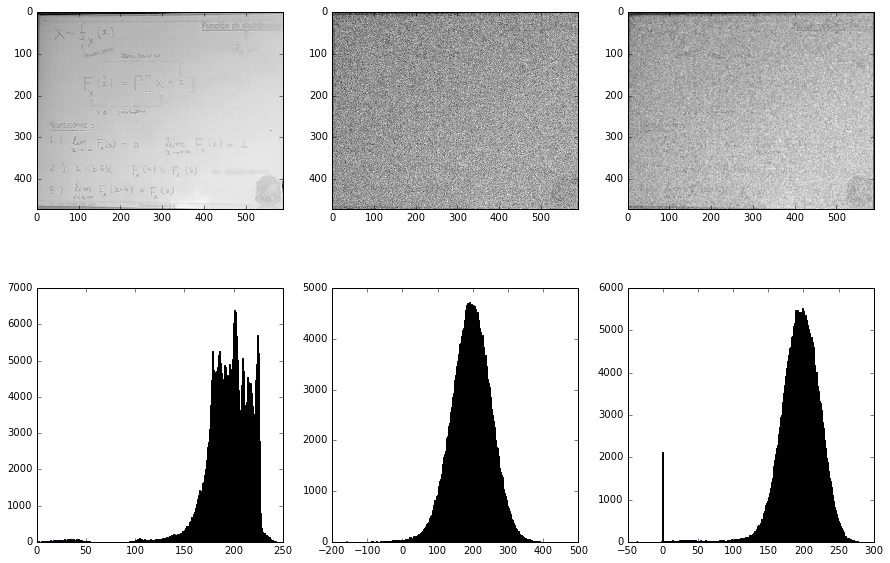

In [10]:
im = cv2.imread('tab01.jpg',cv2.IMREAD_GRAYSCALE)
# im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

print(im.shape)
print(im.dtype)
print(im.size)

im_noised = im+10*np.random.normal(loc=0.0,scale=5.0,size=im.shape)

k = np.array([[1.,1,1],[1,1,1],[1,1,1]])/9    # Mean
# k = np.array([[1.,2,1],[2,4,2],[1,2,1]])/16  # Gauss
# k = 1*np.array([[0.,1,0],[1,-4,1],[0,1,0]])    # Laplacian

im_new = apply_mask_to_image(im_noised,k)

plt.figure(figsize=(15,10))
plt.subplot(231), plt.imshow(im, cmap='gray', interpolation='none')
plt.subplot(232), plt.imshow(im_noised, cmap='gray', interpolation='none')
plt.subplot(233), plt.imshow(im_new, cmap='gray', interpolation='none')
plt.subplot(234), plt.hist(im.ravel(),256)
plt.subplot(235), plt.hist(im_noised.ravel(),256)
plt.subplot(236), plt.hist(im_new.ravel(),256)
plt.show()